In [1]:
bar = '□□□□□□□□□□'	#퍼센트바의 초기 상태
sw = 1
def percent_bar(array,count):   #퍼센트를 표시해주는 함수
    global bar
    global sw
    length = len(array)		
    percent = (count/length)*100	#배열의 길이와 현재 for문의 count의 퍼센트를 구함
    if count == 1 :
        print('preprocessing...txt -> png ')
    print('\r'+bar+'%3s'%str(int(percent))+'%',end='')	#퍼센트바와 퍼센트를 표시
    if sw == 1 :
        if int(percent) % 10 == 0 :
            bar = bar.replace('□','■',1)	#네모가 열개이므로 10퍼센트마다 한개씩 채워줌
            sw = 0
    elif sw == 0 :
        if int(percent) % 10 != 0 :
            sw = 1

In [17]:
import numpy as np
from tensorflow.keras.datasets import mnist

def binarize_data(images, threshold=128):
    # 이미지 이진화 (임계값을 기준으로 0 또는 1로 변환)
    binary_images = (images > threshold).astype(int)
    return binary_images

def save_binarized_mnist_txt(filename, binary_images, labels):
    with open(filename, 'w') as file:
        for i in range(len(binary_images)):
            line = str(labels[i]) + ' ' + ' '.join(map(str, binary_images[i].flatten())) + '\n'
            file.write(line)

print(binarize_data(9,128))

AttributeError: 'bool' object has no attribute 'astype'

In [32]:
from PIL import Image
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import time
time.sleep(1)

# MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=25, batch_size=256, validation_split=0.2)

# 훈련된 모델 저장
model.save('mnist_cnn_model.h5')


Epoch 1/25
188/188 [==============================] - 29s 147ms/step - loss: 0.4125 - accuracy: 0.8806 - val_loss: 0.1193 - val_accuracy: 0.9663
Epoch 2/25
188/188 [==============================] - 32s 169ms/step - loss: 0.0942 - accuracy: 0.9713 - val_loss: 0.0720 - val_accuracy: 0.9783
Epoch 3/25
188/188 [==============================] - 28s 146ms/step - loss: 0.0628 - accuracy: 0.9800 - val_loss: 0.0661 - val_accuracy: 0.9808
Epoch 4/25
188/188 [==============================] - 35s 189ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0515 - val_accuracy: 0.9847
Epoch 5/25
188/188 [==============================] - 29s 152ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 6/25
188/188 [==============================] - 29s 152ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0447 - val_accuracy: 0.9869
Epoch 7/25
188/188 [==============================] - 27s 143ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0429 - val_ac

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)               0         
          

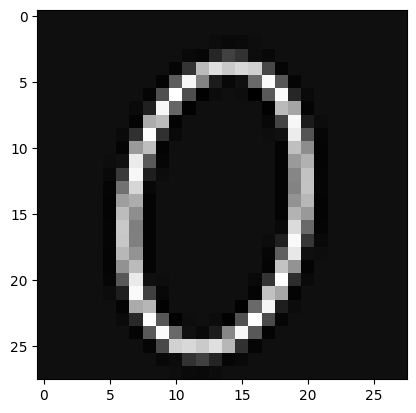

1/1 [==============================] - 0s 36ms/step
가장 높은 정확도를 가진 예측된 숫자: 0 
 O or X : O


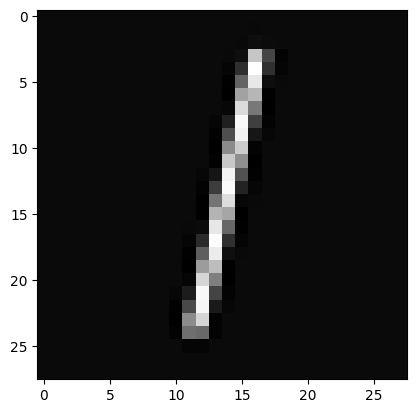

1/1 [==============================] - 0s 25ms/step
가장 높은 정확도를 가진 예측된 숫자: 1 
 O or X : O


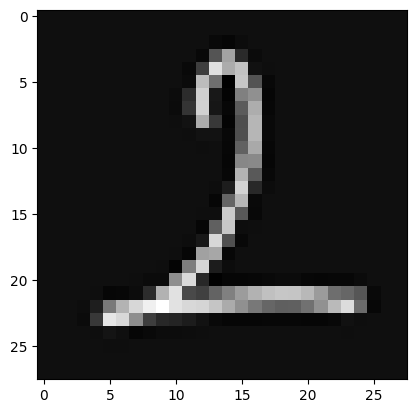

1/1 [==============================] - 0s 38ms/step
가장 높은 정확도를 가진 예측된 숫자: 2 
 O or X : O


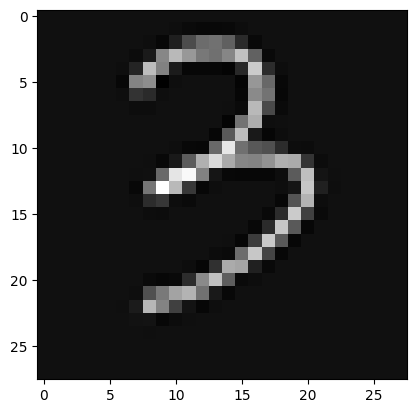

1/1 [==============================] - 0s 26ms/step
가장 높은 정확도를 가진 예측된 숫자: 3 
 O or X : O


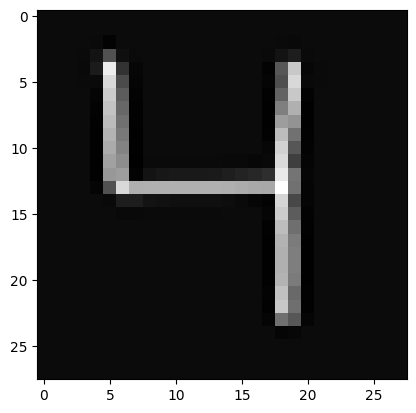

1/1 [==============================] - 0s 25ms/step
가장 높은 정확도를 가진 예측된 숫자: 4 
 O or X : O


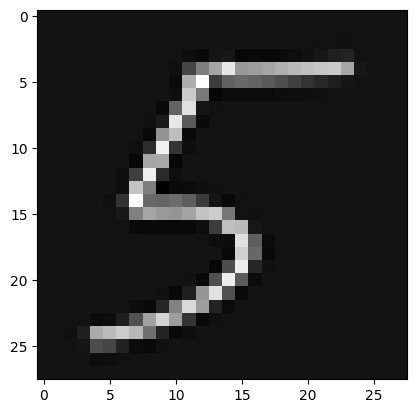

1/1 [==============================] - 0s 47ms/step
가장 높은 정확도를 가진 예측된 숫자: 5 
 O or X : O


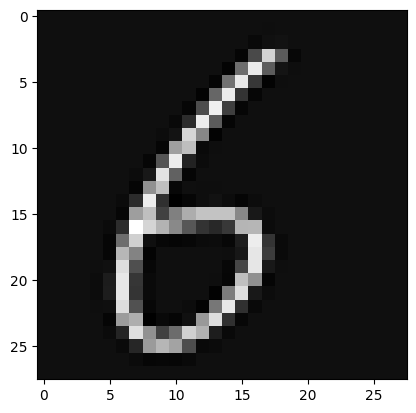

1/1 [==============================] - 0s 26ms/step
가장 높은 정확도를 가진 예측된 숫자: 6 
 O or X : O


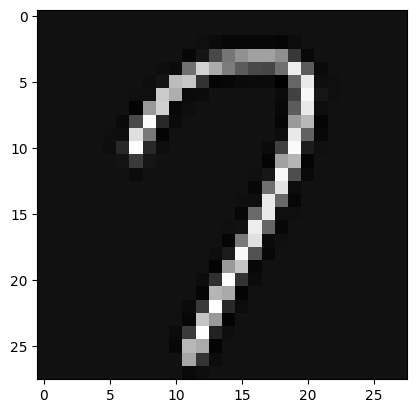

1/1 [==============================] - 0s 26ms/step
가장 높은 정확도를 가진 예측된 숫자: 7 
 O or X : O


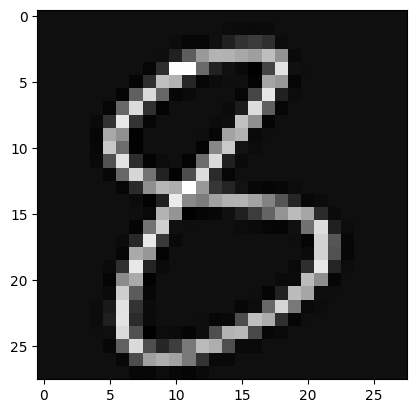

1/1 [==============================] - 0s 32ms/step
가장 높은 정확도를 가진 예측된 숫자: 8 
 O or X : O


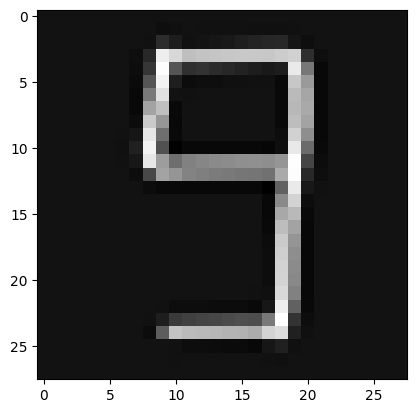

1/1 [==============================] - 0s 23ms/step
가장 높은 정확도를 가진 예측된 숫자: 9 
 O or X : O
accuracy =  100 %


In [49]:
import matplotlib.pyplot as plt

cnt = 0
for i in range(10):
    user_image_path = 'test_'+str(i)+'.png'  # 사용자가 직접 만든 이미지 파일 경로에 따라 수정
    user_image = Image.open(user_image_path).convert('L')  # 이미지를 흑백으로 변환

    # 이미지 크기 조정 및 배열로 변환
    user_image = user_image.resize((28, 28))
    user_image_array = np.array(user_image).astype('float32') / 255.0
    user_image_array = np.expand_dims(user_image_array, axis=0)
    user_image_array = np.expand_dims(user_image_array, axis=-1)

    # 사용자 이미지 시각화
    plt.imshow(user_image_array[0, :, :, 0], cmap='gray')
    plt.show()

    # 모델을 사용하여 예측
    predictions = model.predict(user_image_array)
    predicted_label = np.argmax(predictions)

    # 예측 결과 출력
    
    if (i==predicted_label):

        TF = 'O'
        cnt = cnt+1

    else:
        TF = 'X'


    print(f"가장 높은 정확도를 가진 예측된 숫자: {predicted_label}","\n O or X :",TF)
print("accuracy = ",cnt*10,"%")




In [50]:
from PIL import Image

def crop_image(input_image_path, output_folder, crop_size):
    """
    이미지를 여러 부분으로 자르는 함수

    Parameters:
    - input_image_path: 원본 이미지 파일 경로
    - output_folder: 자른 부분을 저장할 폴더 경로
    - crop_size: 자를 부분의 크기 (가로, 세로)

    Returns:
    - None
    """

    # 이미지 열기
    original_image = Image.open(input_image_path)

    # 이미지 크기
    width, height = original_image.size

    # 자를 부분 크기
    crop_width, crop_height = crop_size

    # 이미지를 여러 부분으로 자르기
    for left in range(0, width, crop_width):
        for top in range(0, height, crop_height):
            right = left + crop_width
            bottom = top + crop_height

            # 부분 이미지 추출
            cropped_image = original_image.crop((left, top, right, bottom))

            # 자른 부분 저장
            output_path = f"{output_folder}/crop_{left}_{top}.png"
            cropped_image.save(output_path)


input_image_path = "test_line.png"  # 원본 이미지 파일 경로
output_folder = "slices_of_test_line"  # 자른 부분을 저장할 폴더 경로
crop_size = (288, 533)  # 자를 부분의 크기 (가로, 세로)

# 폴더가 존재하지 않으면 생성
import os
os.makedirs(output_folder, exist_ok=True)

# 이미지 자르기 함수 호출
crop_image(input_image_path, output_folder, crop_size)
